no stored variable or alias #
no stored variable or alias Extract
no stored variable or alias from
no stored variable or alias Jansen&Rit.ipynb
Extracting EDF parameters from c:\Users\stapl\Documents\CDocuments\FinalYearProject\Model\eeg_sample_data\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


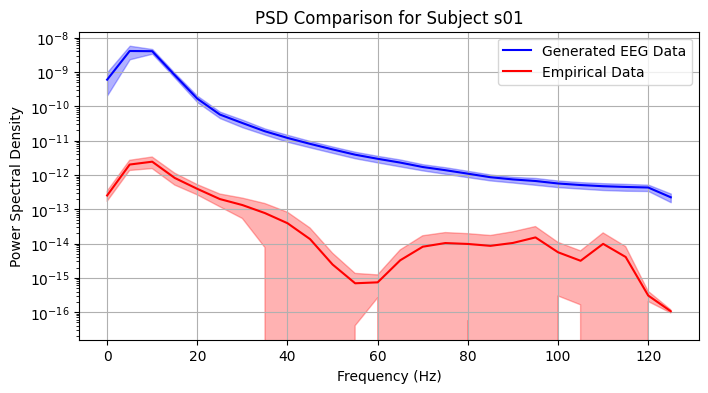

Pearson correlation coefficient between generated and empirical PSDs: 0.9815107437869944
Extracting EDF parameters from c:\Users\stapl\Documents\CDocuments\FinalYearProject\Model\eeg_sample_data\s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


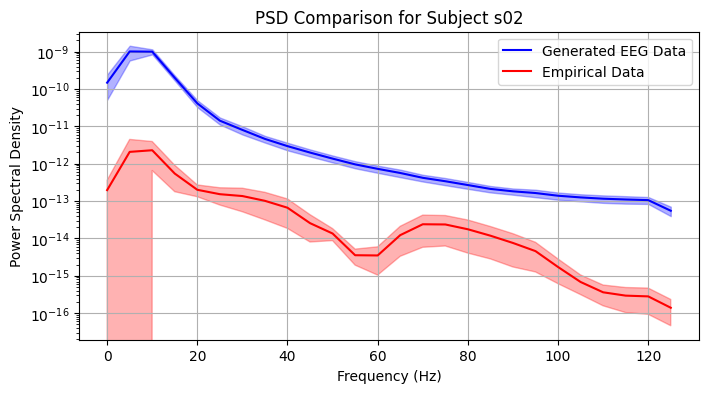

Pearson correlation coefficient between generated and empirical PSDs: 0.9943716003043654
Extracting EDF parameters from c:\Users\stapl\Documents\CDocuments\FinalYearProject\Model\eeg_sample_data\s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


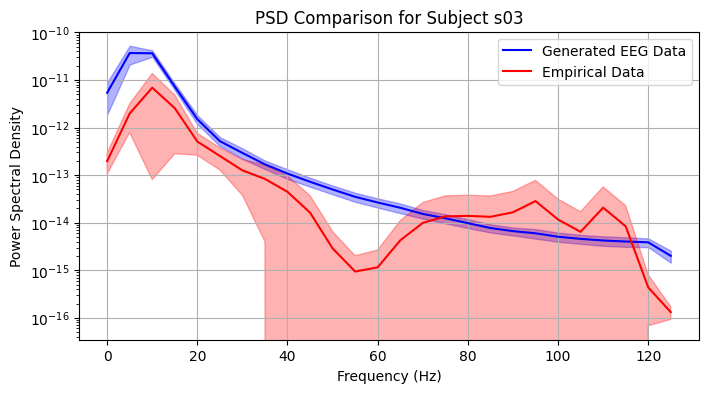

Pearson correlation coefficient between generated and empirical PSDs: 0.8393310480586673
Extracting EDF parameters from c:\Users\stapl\Documents\CDocuments\FinalYearProject\Model\eeg_sample_data\s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


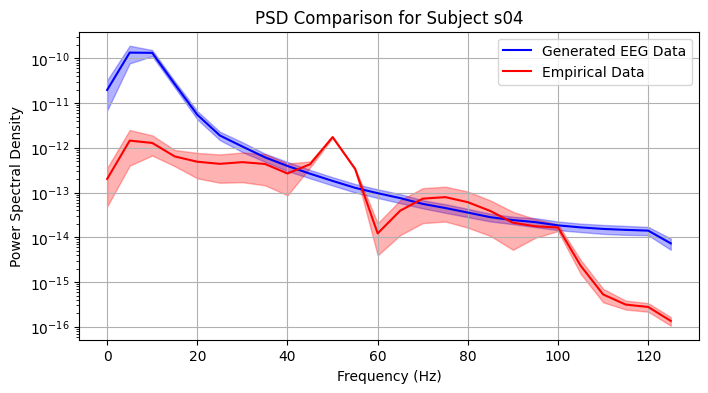

Pearson correlation coefficient between generated and empirical PSDs: 0.6614652704877892
Extracting EDF parameters from c:\Users\stapl\Documents\CDocuments\FinalYearProject\Model\eeg_sample_data\s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


KeyboardInterrupt: 

In [12]:
import mne 
import numpy as np 
from scipy.signal import welch
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn import datasets

# N.B. correct downsampling to 4 before extracting V_T_plot

%store -r V_T_plot # Extract V_T_plot from Jansen&Rit.ipynb

all_psd_empirical = []  # List to store all empirical PSDs

# Function to calculate PSD
def calculate_psd(data, freq, nperseg):
    window = np.hamming(nperseg)
    psd = np.zeros((data.shape[0], len(frequencies)))
    for i, channel_data in enumerate(data):
        f, power_spectrum = welch(channel_data, fs=freq, window=window, nperseg=nperseg, noverlap=nperseg//2)
        psd[i, :] = power_spectrum
    return psd

for subject_id in range(1, 15):
    raw_eeg_file = mne.io.read_raw_edf(f'eeg_sample_data/s{subject_id:02d}.edf')
    empirical_data = raw_eeg_file.get_data()

    # Scale generated data to match empirical data
    scaling_factor = np.max(empirical_data) / np.max(V_T_plot)
    scaled_gen_data = (V_T_plot * scaling_factor).T

    freq = 250
    nperseg = 50  # Number of points in output window
    frequencies = np.fft.rfftfreq(nperseg, d=1/freq)

    # Calculate PSD for generated and empirical data
    psd_gen = calculate_psd(scaled_gen_data, freq, nperseg)
    psd_empirical = calculate_psd(empirical_data, freq, nperseg)
    
    # Append empirical PSD to the list
    all_psd_empirical.append(psd_empirical)

    # Plot PSD for generated data
    plt.figure(figsize=(8, 4))
    plt.semilogy(frequencies, psd_gen.mean(axis=0), label='Generated EEG Data', color='blue')
    plt.fill_between(frequencies, psd_gen.mean(axis=0) - psd_gen.std(axis=0), psd_gen.mean(axis=0) + psd_gen.std(axis=0), alpha=0.3, color='blue')

    # Plot PSD for empirical data
    plt.semilogy(frequencies, psd_empirical.mean(axis=0), label='Empirical Data', color='red')
    plt.fill_between(frequencies, psd_empirical.mean(axis=0) - psd_empirical.std(axis=0), psd_empirical.mean(axis=0) + psd_empirical.std(axis=0), alpha=0.3, color='red')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.legend()
    plt.grid(True)
    plt.title(f'PSD Comparison for Subject s{subject_id:02d}')
    plt.show()

    # Compute and print the Pearson correlation between the PSDs
    correlation_coefficient, _ = pearsonr(psd_gen.mean(axis=0), psd_empirical.mean(axis=0))
    print("Pearson correlation coefficient between generated and empirical PSDs:", correlation_coefficient)

# Convert the list of PSDs to a numpy array and calculate the mean
all_psd_empirical = np.array(all_psd_empirical)
mean_psd_empirical = np.mean(all_psd_empirical, axis=0)

# Plot the averaged empirical PSD
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies, mean_psd_empirical.mean(axis=0), label='Average Empirical Data', color='red')
plt.fill_between(frequencies, mean_psd_empirical.mean(axis=0) - mean_psd_empirical.std(axis=0), mean_psd_empirical.mean(axis=0) + mean_psd_empirical.std(axis=0), alpha=0.3, color='red')
# Plot PSD for generated data
plt.semilogy(frequencies, psd_gen.mean(axis=0), label='Generated EEG Data', color='blue')
plt.fill_between(frequencies, psd_gen.mean(axis=0) - psd_gen.std(axis=0), psd_gen.mean(axis=0) + psd_gen.std(axis=0), alpha=0.3, color='blue')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True)
plt.title('Average PSD Across Subjects')
plt.show()

# Compute and print the Pearson correlation between the PSDs
correlation_coefficient, _ = pearsonr(psd_gen.mean(axis=0), psd_empirical.mean(axis=0))
# Or take correlation then find the mean 
print("Pearson correlation coefficient between generated and empirical PSDs:", correlation_coefficient)
